In [2]:
import csv
import math as m
import networkx as nx

import pandas as pd

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

%load_ext autoreload
%autoreload 2

# Problem Instance

In [3]:
xy_customers = list(csv.reader(
    open('./datasets/original/xy_customers.csv'),delimiter=';',
    quoting=csv.QUOTE_NONNUMERIC))

xy_icps = list(csv.reader(
    open('./datasets/original/xy_icps.csv'),delimiter=';',
    quoting=csv.QUOTE_NONNUMERIC))

xy_crcs = list(csv.reader(
    open('./datasets/original/xy_crcs.csv'),delimiter=';',
    quoting=csv.QUOTE_NONNUMERIC))

In [4]:
I = len(xy_customers)
J = len(xy_icps)
C = len(xy_crcs)

In [12]:
c = [[m.sqrt((i[0]-j[0])**2 + (i[1]-j[1])**2) for i in xy_icps+xy_crcs] for j in xy_icps+xy_crcs]

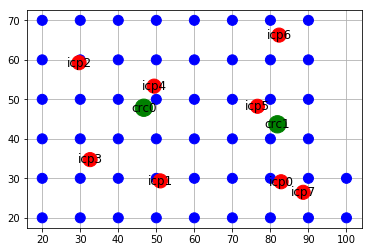

In [6]:
from pkg.lrp_nodes_graph import lrp_nodes_graph
G, pos, labels, colors, size= lrp_nodes_graph(xy_customers, xy_icps, xy_crcs)

plt.grid('on')
nx.draw_networkx(G,pos,labels=labels,node_color=colors,with_labels=True,node_size=size)
plt.show()

# Routing Problem

In [13]:
from pkg.tsp_cplex import tsp_cplex

In [14]:
prob, X = tsp_cplex(J+C,c,
            relaxation=False,path="tsp_cplex.lp")

Default row names c1, c2 ... being created.


Tried aggregator 1 time.
MIP Presolve eliminated 0 rows and 11 columns.
Reduced MIP has 92 rows, 99 columns, and 396 nonzeros.
Reduced MIP has 90 binaries, 0 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.02 sec. (0.18 ticks)
Probing time = 0.00 sec. (0.17 ticks)
Tried aggregator 1 time.
Reduced MIP has 92 rows, 99 columns, and 396 nonzeros.
Reduced MIP has 90 binaries, 0 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.03 sec. (0.18 ticks)
Probing time = 0.00 sec. (0.18 ticks)
Clique table members: 56.
MIP emphasis: balance optimality and feasibility.
MIP search method: dynamic search.
Parallel mode: deterministic, using up to 8 threads.
Root relaxation solution time = 0.00 sec. (0.13 ticks)

        Nodes                                         Cuts/
   Node  Left     Objective  IInf  Best Integer    Best Bound    ItCnt     Gap

      0     0      147.8270    17                    147.8270       21         
      0     0      150.9270    16                    Cuts: 30    

In [15]:
G2 = G.copy()

for j,xj in enumerate(X):
    for i,xij in enumerate(xj):
        if xij == 1:
            G2.add_edge(I+i,I+j)

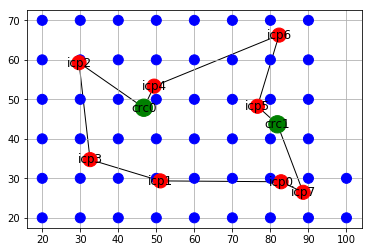

In [16]:
plt.grid('on')
nx.draw_networkx(G2,pos,labels=labels,node_color=colors,with_labels=True,node_size=size)
plt.show()